<a href="https://colab.research.google.com/github/Kavesh-raja/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir dataverse_files

In [2]:
! pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.2 MB/s eta 0:00:00


In [3]:
from glob import glob
import os
import numpy as np
import pandas as pd
import mne
from matplotlib import  pyplot as plt

In [12]:
data_set = glob('dataverse_files/*.edf')
raw = mne.io.read_raw_edf(data_set[0])

def read_data(file_path):
    data = mne.io.read_raw_edf(file_path,preload=True)
    epochs = mne.make_fixed_length_epochs(data,duration = 5, overlap = 1)
    array = epochs.get_data()
    return  max(array[0][0]*1000000)
data_array = [read_data(i) for i in data_set]
df = pd.DataFrame()
data_array.sort()
df['EEG_epochs']  = data_array
print(df)
df2 =pd.read_csv('Sor.csv')
df['ANX'] = df2['ANX']
df.to_csv('epo2.csv')


Extracting EDF parameters from /content/dataverse_files/E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/dataverse_files/E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/dataverse_files/E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF paramet

In [7]:
from sklearn import linear_model
import warnings

[[52.36068394]]


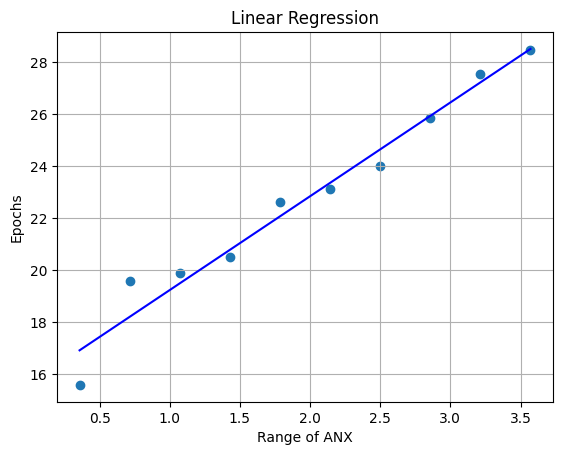

In [13]:
warnings.filterwarnings("ignore")

df = pd.read_csv('epo2.csv')


reg = linear_model.LinearRegression()
reg.fit(df[['ANX']],df[['EEG_epochs']])
print(reg.predict([[10.2]]))
plt.title('Linear Regression')
plt.xlabel('Range of ANX')
plt.ylabel('Epochs')
plt.scatter(df['ANX'],df['EEG_epochs'])
plt.plot(df[['ANX']],reg.predict(df[['ANX']]),color = 'blue')
plt.grid()
plt.show()